# Preprocessing of Scraped Books Metadata

## Import Packages

In [307]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load Scraped Data

In [308]:
df_books = pd.read_csv('output_df.csv')

C:\Users\rayna\AppData\Local\Temp\ipykernel_38724\2330846917.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('output_df.csv')


In [309]:
df_books.shape

(99860, 30)

## Data Cleaning

### Drop Columns

In [310]:
df_books_cleaned = df_books[['book_id', 'title', 'authors', 'num_pages', 'language_code', 'description', 'format', 'is_ebook', 'popular_shelves', 'average_rating', 'ratings_count', 'text_reviews_count']]
print(df_books_cleaned.shape)
df_books_cleaned.head(3)

(99860, 12)


,book_id,title,authors,num_pages,language_code,description,format,is_ebook,popular_shelves,average_rating,ratings_count,text_reviews_count
0,287141,The Aeneid for Boys and Girls,"[{'author_id': '3041852', 'role': ''}]",162.0,en,"Relates in vigorous prose the tale of Aeneas, ...",Paperback,False,"[{'count': '56', 'name': 'to-read'}, {'count':...",4.13,46,7
1,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,"[{'author_id': '19158', 'role': ''}]",216.0,en,"To Kara's astonishment, she discovers that a p...",Paperback,False,"[{'count': '515', 'name': 'to-read'}, {'count'...",4.22,98,6
2,89378,Dog Heaven,"[{'author_id': '5411', 'role': ''}]",40.0,eng,In Newbery Medalist Cynthia Rylant's classic b...,Hardcover,False,"[{'count': '450', 'name': 'to-read'}, {'count'...",4.43,1331,193


### Removal of Missing Values

In [311]:
df_books_cleaned.dropna(axis=0, how='any', inplace=True)
print(df_books_cleaned.shape)
df_books_cleaned.head(3)

(85468, 12)


C:\Users\rayna\AppData\Local\Temp\ipykernel_38724\1452899971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books_cleaned.dropna(axis=0, how='any', inplace=True)


,book_id,title,authors,num_pages,language_code,description,format,is_ebook,popular_shelves,average_rating,ratings_count,text_reviews_count
0,287141,The Aeneid for Boys and Girls,"[{'author_id': '3041852', 'role': ''}]",162.0,en,"Relates in vigorous prose the tale of Aeneas, ...",Paperback,False,"[{'count': '56', 'name': 'to-read'}, {'count':...",4.13,46,7
1,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,"[{'author_id': '19158', 'role': ''}]",216.0,en,"To Kara's astonishment, she discovers that a p...",Paperback,False,"[{'count': '515', 'name': 'to-read'}, {'count'...",4.22,98,6
2,89378,Dog Heaven,"[{'author_id': '5411', 'role': ''}]",40.0,eng,In Newbery Medalist Cynthia Rylant's classic b...,Hardcover,False,"[{'count': '450', 'name': 'to-read'}, {'count'...",4.43,1331,193


### Removal of Outliers

In [312]:
# Define function to plot distribution of numerical variables
def plot_distributions(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(['number']).columns

    # Create subplots: one row for each feature, with both a boxplot and a histogram
    n_cols = len(numerical_cols)
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5 * n_cols))
    
    for i, col in enumerate(numerical_cols):
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[i, 0])
        axes[i, 0].set_title(f'Boxplot of {col}')
        
        # Histogram
        sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()

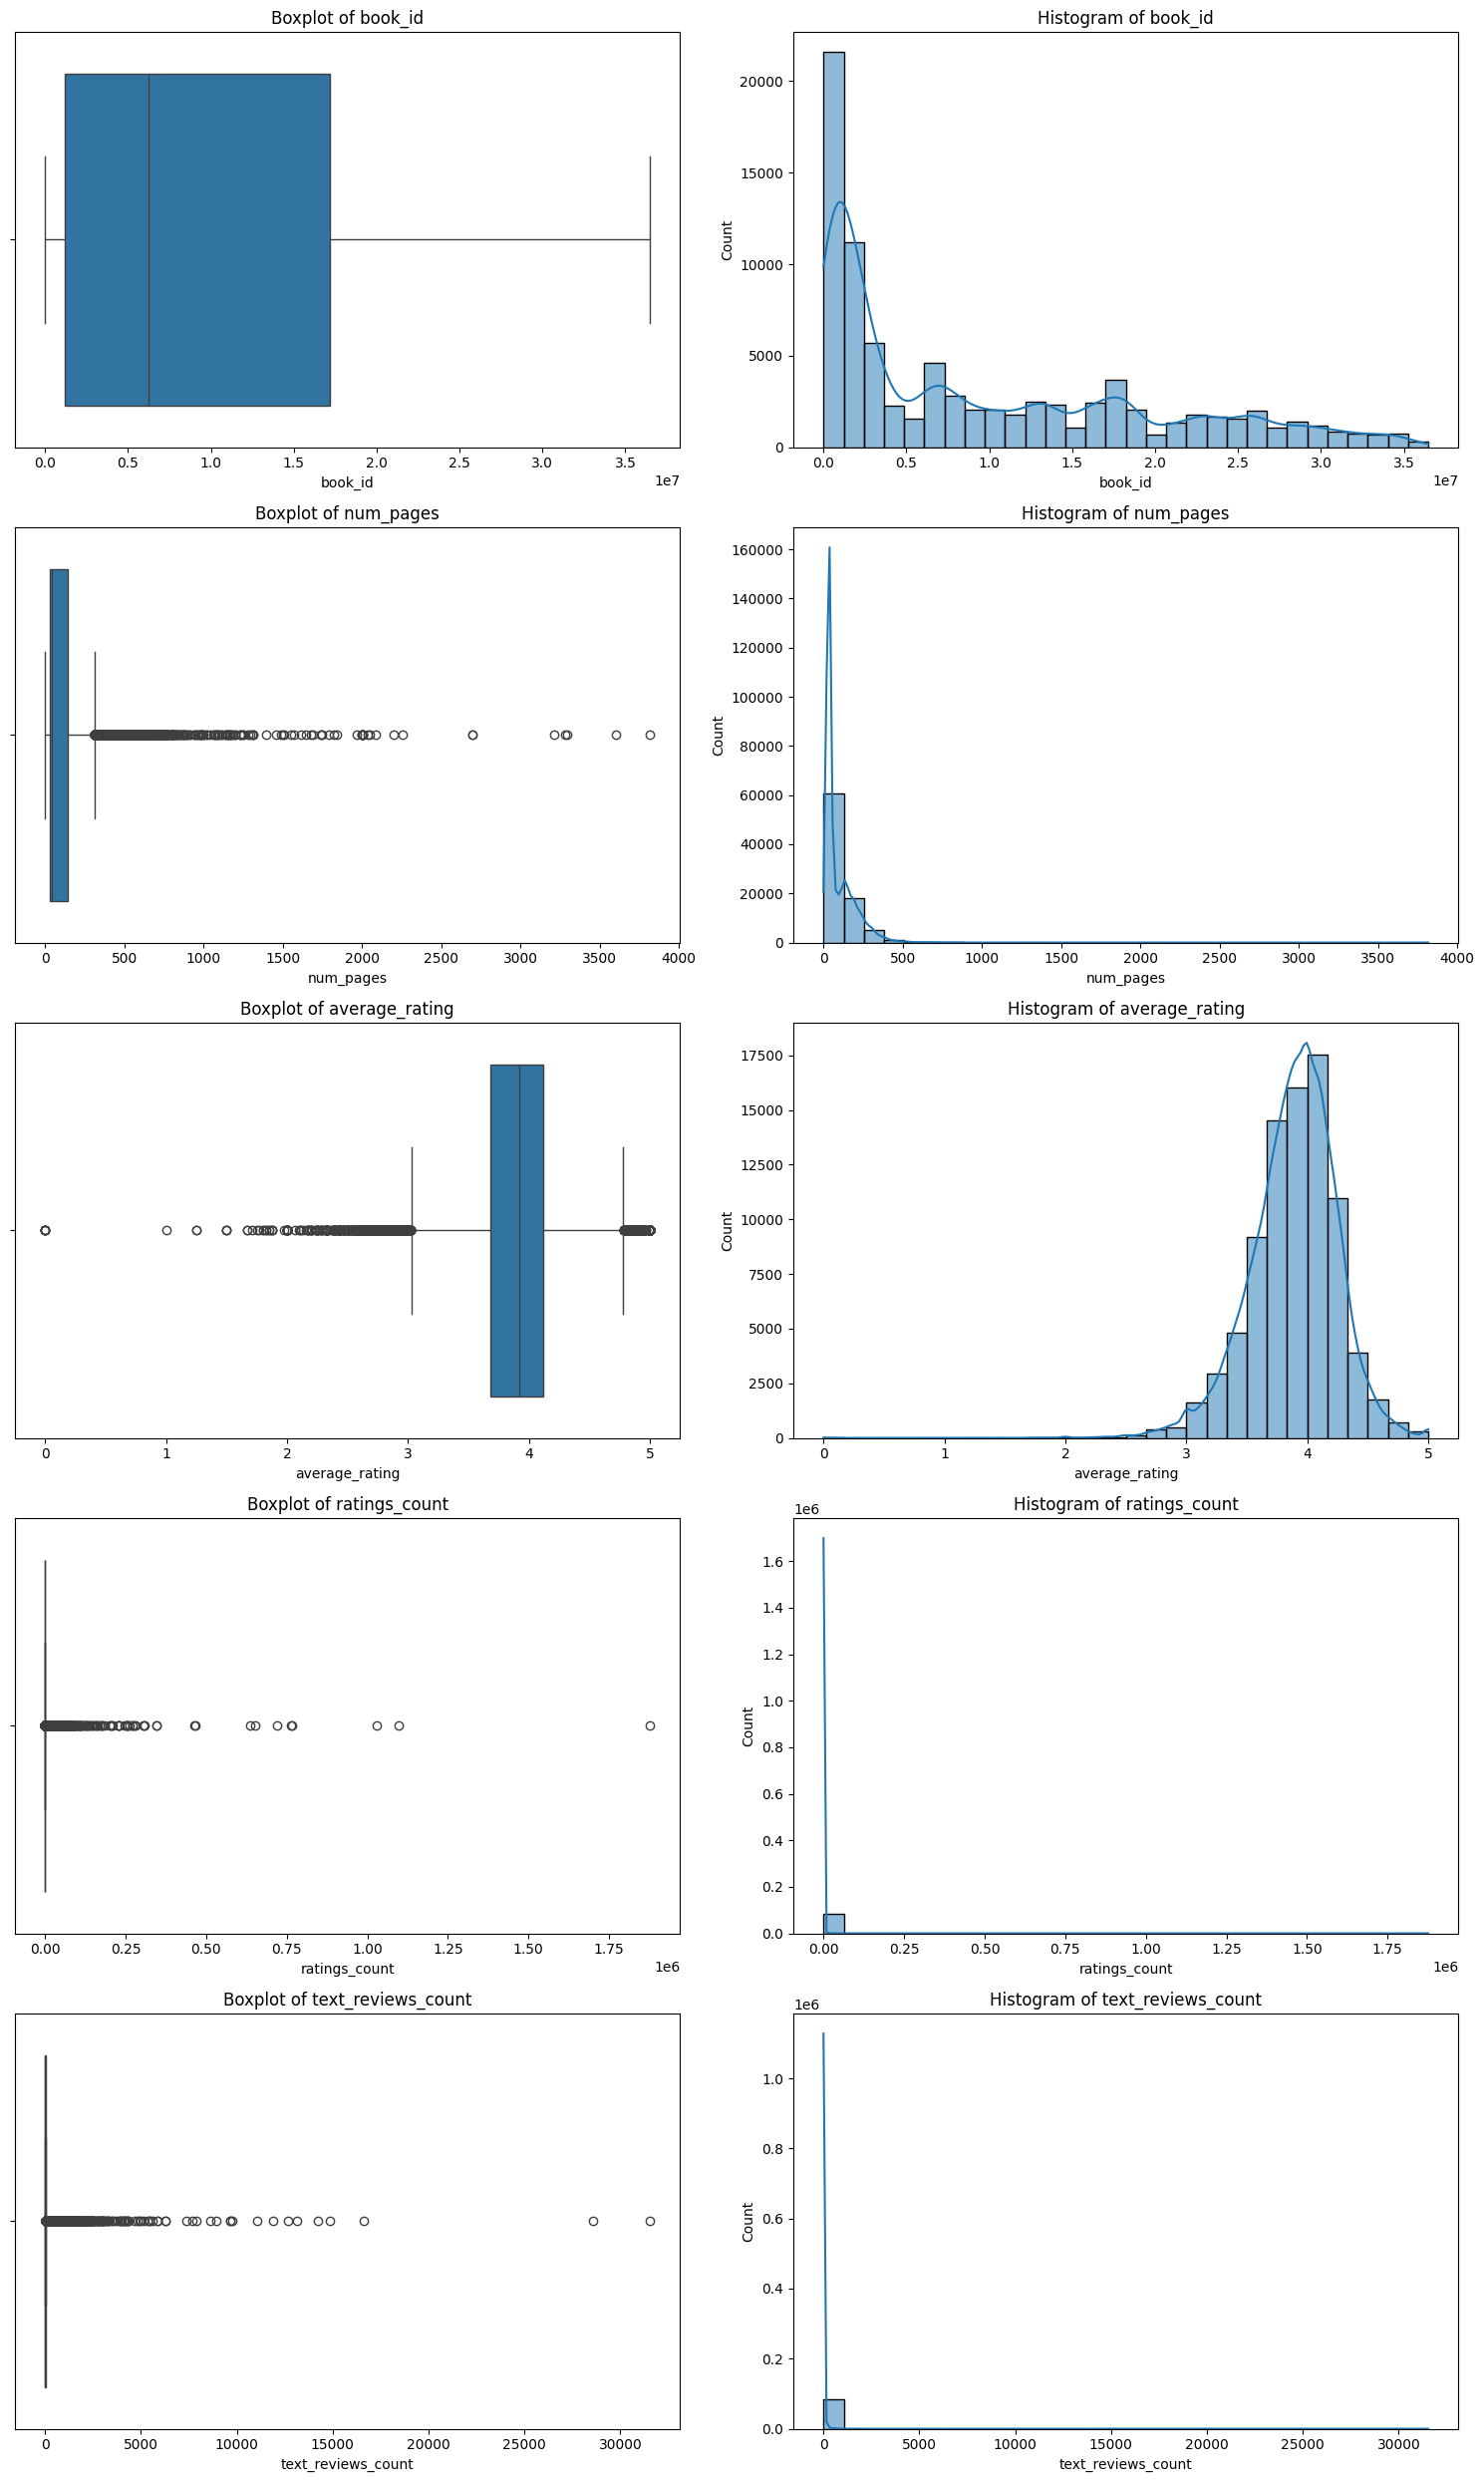

In [313]:
plot_distributions(df_books_cleaned)

#### Removing books with few ratings

In [314]:
df_books_cleaned.shape

(85468, 12)

In [315]:
# Sort the DataFrame by 'ratings_count' in ascending order
df_books_cleaned = df_books_cleaned.sort_values('ratings_count', ascending=True)

# Calculate the cutoff index for the top 30%
cutoff_index = int(len(df_books_cleaned) * 0.3)

# Remove the top 30% of books with the lowest rating count
df_books_cleaned = df_books_cleaned.iloc[cutoff_index:]

In [316]:
df_books_cleaned.shape

(59828, 12)

## Feature Engineering

### Book Format

Categorise to 4 main categories (kindle, audiobook, hardcover and novelty) and others

In [317]:
def categorize_format(format_value):
    if 'ebook' in format_value.lower() or 'kindle' in format_value.lower() or 'pdf' in format_value.lower():
        return 'Digital'
    elif 'audio' in format_value.lower() or 'audiobook' in format_value.lower() or 'cd' in format_value.lower():
        return 'Audio'
    elif 'paper' in format_value.lower() or 'hardcover' in format_value.lower() or 'softcover' in format_value.lower():
        return 'Physical'
    elif 'board' in format_value.lower() or 'novelty' in format_value.lower():
        return 'Specialty'
    else:
        return 'Other'

In [318]:
df_books_cleaned['format'] = df_books_cleaned['format'].apply(categorize_format)
df_books_cleaned.head(3)

,book_id,title,authors,num_pages,language_code,description,format,is_ebook,popular_shelves,average_rating,ratings_count,text_reviews_count
40426,1882090,"Behave Yourself, Bethany Brant","[{'author_id': '151369', 'role': ''}]",172.0,en,A preacher's daughter with lots of curiosity a...,Physical,False,"[{'count': '5', 'name': 'to-read'}, {'count': ...",3.56,16,2
35131,166120,Ghosthunters And The Incredibly Revolting Ghost,"[{'author_id': '15873', 'role': ''}]",144.0,en,A $2.99 value-priced edition of one of our bes...,Physical,False,"[{'count': '254', 'name': 'to-read'}, {'count'...",3.67,16,5
35157,8608741,Attack of the Chicken Nugget Man: A National T...,"[{'author_id': '2868520', 'role': ''}]",110.0,en,Third-grader Chris Robb just can't seem to do ...,Physical,False,"[{'count': '63', 'name': 'to-read'}, {'count':...",3.70,16,12


### Book Length

Categorise number of pages to 3 categories (short, medium and long)

In [319]:
# function to classify whether the book is a short read, medium or long read
def classify_book_length(pages):
    if pages < 100:
        return 'short'
    elif 100 <= pages <= 300:
        return 'medium'
    else:
        return 'long'

df_books_cleaned['book_length'] = df_books_cleaned['num_pages'].apply(classify_book_length)
df_books_cleaned[['num_pages', 'book_length']].head()

,num_pages,book_length
40426,172.0,medium
35131,144.0,medium
35157,110.0,medium
35171,42.0,short
7182,26.0,short


In [320]:
df_books_cleaned['book_length'].value_counts()

book_length
short     39060
medium    17809
long       2959
Name: count, dtype: int64

### Language Code

Group all english books (eng, en, en-US, en-CA, etc) as english

In [321]:
df_books_cleaned['language_code'].unique()

array(['en', 'eng', 'swe', 'spa', 'ger', 'en-US', 'ita', 'nl', 'fil',
       'per', 'por', 'fin', 'es', 'ind', 'fre', 'gre', 'nor', 'pol',
       'ara', 'en-GB', 'fr', 'cze', 'rum', 'lit', 'est', 'mal', 'dan',
       'ja', 'id', 'jpn', 'vie', 'ko', 'tur', 'rus', 'it', 'tha', 'bul',
       'ukr', 'de', 'kor', 'fi', 'ru', 'en-CA', 'ben', 'hun', 'tgl', 'sv',
       'zho', 'sco', 'ar', 'slo', 'nob', 'ro', 'fa', 'tr', 'lav', 'kat',
       'bg', 'srp', 'pl', 'roh', 'mul', 'sin', 'msa', 'scr', 'iu', 'nno',
       'cat', 'glg', 'eo', 'pes', 'lat', 'isl', 'pt-BR', 'bs', 'zh-CN',
       'cs', 'egy', 'da', 'bn', 'guj', 'mlt', 'slv', 'bos', 'vi'],
      dtype=object)

#### Drop books with '--' as language code

In [322]:
df_books_cleaned = df_books_cleaned[df_books_cleaned['language_code'] != '--']

In [323]:
def categorize_lang_code(lang_code):

    language_groups = {
        'en': ['eng', 'en-GB', 'en-US', 'en-CA'],
        'de': ['de', 'ger'],
        'fr': ['fr', 'fre'],
        'es': ['es', 'spa'],
        'it': ['it', 'ita'],
        'pt': ['pt', 'por', 'pt-BR'],
        'ru': ['ru', 'rus'],
        'ar': ['ar', 'ara'],
        'ja': ['ja', 'jpn'],
        'ko': ['ko', 'kor'],
        'zh': ['zh-CN', 'zho'],
        'hi': ['hi', 'hin'],
        'fr': ['fr', 'fre'],
        'fin': ['fi'],
        'pol': ['pl'],
        'nor': ['nob']
        # Add more language groups as needed
    }

    for group, codes in language_groups.items():
        if lang_code in codes:
            return group
        
    return lang_code

df_books_cleaned['language_code'] = df_books_cleaned['language_code'].apply(categorize_lang_code)

In [324]:
df_books_cleaned['language_code'].unique()

array(['en', 'swe', 'es', 'de', 'it', 'nl', 'fil', 'per', 'pt', 'fin',
       'ind', 'fr', 'gre', 'nor', 'pol', 'ar', 'cze', 'rum', 'lit', 'est',
       'mal', 'dan', 'ja', 'id', 'vie', 'ko', 'tur', 'ru', 'tha', 'bul',
       'ukr', 'ben', 'hun', 'tgl', 'sv', 'zh', 'sco', 'slo', 'ro', 'fa',
       'tr', 'lav', 'kat', 'bg', 'srp', 'roh', 'mul', 'sin', 'msa', 'scr',
       'iu', 'nno', 'cat', 'glg', 'eo', 'pes', 'lat', 'isl', 'bs', 'cs',
       'egy', 'da', 'bn', 'guj', 'mlt', 'slv', 'bos', 'vi'], dtype=object)

### Filter Popular Shelves

Excluding to-read and currently-reading, we selected the top 3 popular shelves

In [325]:
df_books_cleaned.head(3)

,book_id,title,authors,num_pages,language_code,description,format,is_ebook,popular_shelves,average_rating,ratings_count,text_reviews_count,book_length
40426,1882090,"Behave Yourself, Bethany Brant","[{'author_id': '151369', 'role': ''}]",172.0,en,A preacher's daughter with lots of curiosity a...,Physical,False,"[{'count': '5', 'name': 'to-read'}, {'count': ...",3.56,16,2,medium
35131,166120,Ghosthunters And The Incredibly Revolting Ghost,"[{'author_id': '15873', 'role': ''}]",144.0,en,A $2.99 value-priced edition of one of our bes...,Physical,False,"[{'count': '254', 'name': 'to-read'}, {'count'...",3.67,16,5,medium
35157,8608741,Attack of the Chicken Nugget Man: A National T...,"[{'author_id': '2868520', 'role': ''}]",110.0,en,Third-grader Chris Robb just can't seem to do ...,Physical,False,"[{'count': '63', 'name': 'to-read'}, {'count':...",3.70,16,12,medium


In [326]:
import ast

# Convert popular_shelves columns from strings to actual lists of dictionaries (if they are strings)
df_books_cleaned['popular_shelves'] = df_books_cleaned['popular_shelves'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [327]:
def get_top_3_pop_shelves(data):
    # Filter out 'to-read' and 'currently-reading'
    data = [d for d in data if (d['name'] != 'to-read' and d['name'] != 'currently-reading')]
    sorted_data = sorted(data, key=lambda x: x['count'], reverse=True)

    if len(sorted_data) > 3:
        return sorted_data[:3]
    return sorted_data

In [328]:
df_books_cleaned['top_popular_shelves'] = df_books_cleaned['popular_shelves'].apply(get_top_3_pop_shelves)

### Extract Authors from Author Column with List of Dictionaries

In [329]:
# Convert authors columns from strings to actual lists of dictionaries (if they are strings)
df_books_cleaned['authors'] = df_books_cleaned['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Define functions to extract author_ids
def extract_author_ids(authors_list):
    if isinstance(authors_list, list):
        return [author['author_id'] for author in authors_list if 'author_id' in author]
    return []

# Apply function to create new columns
df_books_cleaned['author_ids'] = df_books_cleaned['authors'].apply(extract_author_ids)

### Vectorise Text Columns

#### TF-IDF on Book Titles

In [355]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the titles
title_tfidf = tfidf_vectorizer.fit_transform(df_books_cleaned['title'])

In [356]:
title_tfidf.shape

(59828, 25034)

In [359]:
title_tfidf

<59828x25034 sparse matrix of type '<class 'numpy.float64'>'
	with 194839 stored elements in Compressed Sparse Row format>

In [332]:
# df_books_cleaned.shape

In [333]:
# df_books_cleaned.head(3)

In [334]:
# import scipy.sparse

# # Convert each row of the sparse matrix to a compressed sparse row (CSR) format and store it in a new column
# df_books_cleaned['title_tfidf'] = [scipy.sparse.csr_matrix(title_tfidf[i]) for i in range(title_tfidf.shape[0])]


In [335]:
# df_books_cleaned.head(3)

#### Word2Vec on Book Description

Word2Vec captures semantic relationships between words and book descriptions are usually longer and would contain more contextual information. Thus, we used Word2Vec here instead of TF-IDF to better capture the understanding of themes and content of the descriptions.

In [336]:
df_books_cleaned.columns

Index(['book_id', 'title', 'authors', 'num_pages', 'language_code',
       'description', 'format', 'is_ebook', 'popular_shelves',
       'average_rating', 'ratings_count', 'text_reviews_count', 'book_length',
       'top_popular_shelves', 'author_ids'],
      dtype='object')

In [337]:
from gensim.models import Word2Vec

In [357]:
book_descriptions = df_books_cleaned['description']

# Tokenize book descriptions
tokenized_descriptions = [description.split() for description in book_descriptions]

# Train Word2Vec model
model = Word2Vec(tokenized_descriptions, vector_size=100, window=5, min_count=1, workers=4)

# To get a single vector for an entire description, average the word vectors
def get_vector(text):
    words = text.split()
    word_vectors = np.array([model.wv[word] for word in words if word in model.wv])
    return np.mean(word_vectors, axis=0) if word_vectors.size else np.zeros(model.vector_size)

# Vectorize descriptions
descriptions_vectors = np.array([get_vector(description) for description in book_descriptions])


In [358]:
descriptions_vectors.shape

(59828, 100)

In [340]:
# df_books_cleaned['description_word2vec'] = list(descriptions_vectors)

In [341]:
print(df_books_cleaned.shape)
df_books_cleaned.head(3)

(59828, 15)


,book_id,title,authors,num_pages,language_code,description,format,is_ebook,popular_shelves,average_rating,ratings_count,text_reviews_count,book_length,top_popular_shelves,author_ids
40426,1882090,"Behave Yourself, Bethany Brant","[{'author_id': '151369', 'role': ''}]",172.0,en,A preacher's daughter with lots of curiosity a...,Physical,False,"[{'count': '5', 'name': 'to-read'}, {'count': ...",3.56,16,2,medium,"[{'count': '1', 'name': 'mrs-withdrawn'}, {'co...",[151369]
35131,166120,Ghosthunters And The Incredibly Revolting Ghost,"[{'author_id': '15873', 'role': ''}]",144.0,en,A $2.99 value-priced edition of one of our bes...,Physical,False,"[{'count': '254', 'name': 'to-read'}, {'count'...",3.67,16,5,medium,"[{'count': '9', 'name': 'owned'}, {'count': '9...",[15873]
35157,8608741,Attack of the Chicken Nugget Man: A National T...,"[{'author_id': '2868520', 'role': ''}]",110.0,en,Third-grader Chris Robb just can't seem to do ...,Physical,False,"[{'count': '63', 'name': 'to-read'}, {'count':...",3.70,16,12,medium,"[{'count': '2', 'name': 'books-i-wrote'}, {'co...",[2868520]


## One-Hot Encoding

In [342]:
df_books_encoded = pd.get_dummies(df_books_cleaned, columns=['format', 'language_code', 'book_length'], prefix=['format', 'lang', 'length'])

## Removal of Redundant Columns for Modeling

In [343]:
print(df_books_encoded.shape)
df_books_encoded.columns

(59828, 88)


Index(['book_id', 'title', 'authors', 'num_pages', 'description', 'is_ebook',
       'popular_shelves', 'average_rating', 'ratings_count',
       'text_reviews_count', 'top_popular_shelves', 'author_ids',
       'format_Audio', 'format_Digital', 'format_Other', 'format_Physical',
       'format_Specialty', 'lang_ar', 'lang_ben', 'lang_bg', 'lang_bn',
       'lang_bos', 'lang_bs', 'lang_bul', 'lang_cat', 'lang_cs', 'lang_cze',
       'lang_da', 'lang_dan', 'lang_de', 'lang_egy', 'lang_en', 'lang_eo',
       'lang_es', 'lang_est', 'lang_fa', 'lang_fil', 'lang_fin', 'lang_fr',
       'lang_glg', 'lang_gre', 'lang_guj', 'lang_hun', 'lang_id', 'lang_ind',
       'lang_isl', 'lang_it', 'lang_iu', 'lang_ja', 'lang_kat', 'lang_ko',
       'lang_lat', 'lang_lav', 'lang_lit', 'lang_mal', 'lang_mlt', 'lang_msa',
       'lang_mul', 'lang_nl', 'lang_nno', 'lang_nor', 'lang_per', 'lang_pes',
       'lang_pol', 'lang_pt', 'lang_ro', 'lang_roh', 'lang_ru', 'lang_rum',
       'lang_sco', 'lang_scr', 'l

In [344]:
df_books_final = df_books_encoded.drop(['authors', 'num_pages', 'is_ebook', 'popular_shelves'], axis=1)

In [345]:
df_books_final.columns

Index(['book_id', 'title', 'description', 'average_rating', 'ratings_count',
       'text_reviews_count', 'top_popular_shelves', 'author_ids',
       'format_Audio', 'format_Digital', 'format_Other', 'format_Physical',
       'format_Specialty', 'lang_ar', 'lang_ben', 'lang_bg', 'lang_bn',
       'lang_bos', 'lang_bs', 'lang_bul', 'lang_cat', 'lang_cs', 'lang_cze',
       'lang_da', 'lang_dan', 'lang_de', 'lang_egy', 'lang_en', 'lang_eo',
       'lang_es', 'lang_est', 'lang_fa', 'lang_fil', 'lang_fin', 'lang_fr',
       'lang_glg', 'lang_gre', 'lang_guj', 'lang_hun', 'lang_id', 'lang_ind',
       'lang_isl', 'lang_it', 'lang_iu', 'lang_ja', 'lang_kat', 'lang_ko',
       'lang_lat', 'lang_lav', 'lang_lit', 'lang_mal', 'lang_mlt', 'lang_msa',
       'lang_mul', 'lang_nl', 'lang_nno', 'lang_nor', 'lang_per', 'lang_pes',
       'lang_pol', 'lang_pt', 'lang_ro', 'lang_roh', 'lang_ru', 'lang_rum',
       'lang_sco', 'lang_scr', 'lang_sin', 'lang_slo', 'lang_slv', 'lang_srp',
       'lang_sv'

## Scaling of Features

In [346]:
from sklearn.preprocessing import StandardScaler

In [347]:
numerical_columns = ['average_rating', 'ratings_count', 'text_reviews_count']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df_books_final[numerical_columns] = scaler.fit_transform(df_books_final[numerical_columns])

In [348]:
df_books_final['text_reviews_count'].describe()

count    5.982800e+04
mean     7.600912e-18
std      1.000008e+00
min     -1.430055e-01
25%     -1.228221e-01
50%     -1.060026e-01
75%     -5.554409e-02
max      1.059410e+02
Name: text_reviews_count, dtype: float64

## Export Final Books Dataframe to CSV

In [349]:
df_books_final.shape

(59828, 84)

In [350]:
df_books_final.head()

,book_id,title,description,average_rating,ratings_count,text_reviews_count,top_popular_shelves,author_ids,format_Audio,format_Digital,...,lang_tha,lang_tr,lang_tur,lang_ukr,lang_vi,lang_vie,lang_zh,length_long,length_medium,length_short
40426,1882090,"Behave Yourself, Bethany Brant",A preacher's daughter with lots of curiosity a...,-1.028630,-0.059069,-0.136278,"[{'count': '1', 'name': 'mrs-withdrawn'}, {'co...",[151369],False,False,...,False,False,False,False,False,False,False,False,True,False
35131,166120,Ghosthunters And The Incredibly Revolting Ghost,A $2.99 value-priced edition of one of our bes...,-0.690046,-0.059069,-0.126186,"[{'count': '9', 'name': 'owned'}, {'count': '9...",[15873],False,False,...,False,False,False,False,False,False,False,False,True,False
35157,8608741,Attack of the Chicken Nugget Man: A National T...,Third-grader Chris Robb just can't seem to do ...,-0.597705,-0.059069,-0.102639,"[{'count': '2', 'name': 'books-i-wrote'}, {'co...",[2868520],False,False,...,False,False,False,False,False,False,False,False,True,False
35171,22928673,The Chicken Who Had a Toothache,Once upon a time there was a chicken who thoug...,-0.259121,-0.059069,-0.119458,"[{'count': '4', 'name': 'picture-books'}, {'co...",[214840],False,False,...,False,False,False,False,False,False,False,False,False,True
7182,21561023,A Pebble Story,Let's go pebbling! A child's imagination can f...,-3.121696,-0.059069,-0.116094,"[{'count': '6', 'name': 'netgalley'}, {'count'...","[122714, 489963]",False,False,...,False,False,False,False,False,False,False,False,False,True


In [351]:
df_books_final.to_csv('df_books_final.csv', index=False)